In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import torch
import numpy as np

# Adding project path
sys.path.append(f'{os.getcwd()}/../')

In [3]:
from torchvision import transforms as T
from torchvision.utils import *

<module 'av' from '/pfs/rdi/cei/algo_train/abrawat/envs/pyt3d_A100/lib/python3.9/site-packages/av/__init__.py'>


In [4]:
from synthforge_train.src.data.synthforge import SynthForgeDataset
from synthforge_train.src.data.utils import seg_classes_to_colors

In [5]:
ds = SynthForgeDataset(
    dataset_path='...',
    is_train=False,
    disable_crop_op=True
)

In [6]:
plot_colors_next3d = [torch.tensor(x) for x in SynthForgeDataset.SEG_COLORMAP.values()]

In [7]:
sample = ds[np.random.randint(len(ds))]
img = sample['img'] * 0.5 + 0.5
seg_map = seg_classes_to_colors(sample["seg_label"].unsqueeze(0), plot_colors_next3d)
depth = sample['depth']

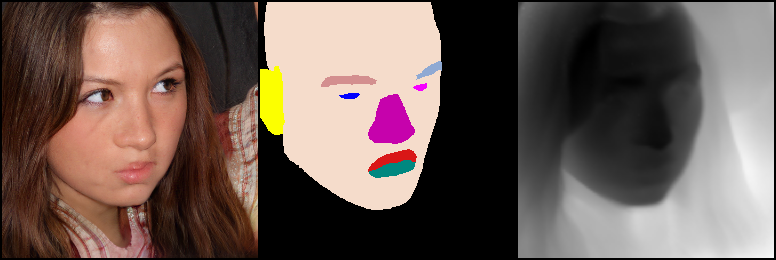

In [8]:
T.ToPILImage()(make_grid(torch.stack(
    [img, seg_map, depth.repeat(3, 1, 1)]
)))